Predicting Movie Success

Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
from sklearn import svm

In [2]:
data = pd.read_csv("/content/movie_dataset capstone.csv")

In [3]:
data.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [4]:
data.drop(columns=['movie_title','plot_keywords','movie_imdb_link','facenumber_in_poster'],inplace= True)

In [5]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

EDA

In [7]:
data.isnull().sum()

,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [8]:
si = SimpleImputer(strategy='mean')
data['num_critic_for_reviews']=si.fit_transform(data[['num_critic_for_reviews']]).ravel()
data['duration']=si.fit_transform(data[['duration']]).ravel()
data['director_facebook_likes']=si.fit_transform(data[['director_facebook_likes']]).ravel()
data['actor_3_facebook_likes']=si.fit_transform(data[['actor_3_facebook_likes']]).ravel()
data['actor_1_facebook_likes']=si.fit_transform(data[['actor_1_facebook_likes']]).ravel()
data['gross']=si.fit_transform(data[['gross']]).ravel()
data['num_user_for_reviews']=si.fit_transform(data[['num_user_for_reviews']]).ravel()
data['budget']=si.fit_transform(data[['budget']]).ravel()
data['title_year']=si.fit_transform(data[['title_year']]).ravel()
data['actor_2_facebook_likes']=si.fit_transform(data[['actor_2_facebook_likes']]).ravel()
data['imdb_score']=si.fit_transform(data[['imdb_score']]).ravel()
data['aspect_ratio']=si.fit_transform(data[['aspect_ratio']]).ravel()
data['movie_facebook_likes']=si.fit_transform(data[['movie_facebook_likes']]).ravel()


In [9]:
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.dropna(subset=categorical_columns)

In [10]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [11]:

def classify_movie(score):
    if 1 <= score <= 3:
        return "Flop Movie"
    elif 3 < score <= 6:
        return "Average Movie"
    else:
        return "Hit Movie"


data['Classify'] = data['imdb_score'].apply(classify_movie)


<ipython-input-11-04dbac34956b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Classify'] = data['imdb_score'].apply(classify_movie)


In [12]:
data.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Classify
5035,Color,Robert Rodriguez,56.000000,81.0,0.0,6.0,Peter Marquardt,121.0,2.040920e+06,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7.000000e+03,1992.0,20.0,6.9,1.370000,0.0,Hit Movie
5036,Color,Anthony Vallone,140.194272,84.0,2.0,2.0,John Considine,45.0,4.846841e+07,Crime|Drama,...,English,USA,PG-13,3.250000e+03,2005.0,44.0,7.8,2.220403,4.0,Hit Movie
5037,Color,Edward Burns,14.000000,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4.584000e+03,Comedy|Drama,...,English,USA,Not Rated,9.000000e+03,2011.0,205.0,6.4,2.220403,413.0,Hit Movie
5041,Color,Daniel Hsia,14.000000,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Comedy|Drama|Romance,...,English,USA,PG-13,3.975262e+07,2012.0,719.0,6.3,2.350000,660.0,Hit Movie
5042,Color,Jon Gunn,43.000000,90.0,16.0,16.0,Brian Herzlinger,86.0,8.522200e+04,Documentary,...,English,USA,PG,1.100000e+03,2004.0,23.0,6.6,1.850000,456.0,Hit Movie


In [13]:
data.isnull().sum()

,0
color,0
director_name,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_2_name,0
actor_1_facebook_likes,0
gross,0
genres,0


In [14]:
data['Classify'].value_counts()

,count
Classify,
Hit Movie,3167
Average Movie,1437
Flop Movie,42


In [15]:
data['director_name'].value_counts()

,count
director_name,
Steven Spielberg,26
Woody Allen,22
Clint Eastwood,20
Martin Scorsese,20
Ridley Scott,17
...,...
Paul Mazursky,1
Patrice Leconte,1
Jez Butterworth,1


In [16]:
data['actor_2_name'].value_counts()

,count
actor_2_name,
Morgan Freeman,20
Charlize Theron,15
Brad Pitt,14
Meryl Streep,11
James Franco,11
...,...
Caity Lotz,1
Ricardo Montalban,1
Nia Vardalos,1


In [17]:
data['genres'].value_counts()

,count
genres,
Drama,210
Comedy,186
Comedy|Drama|Romance,177
Comedy|Drama,171
Drama|Romance,145
...,...
Action|Adventure|Crime|Drama|Family|Fantasy|Romance|Thriller,1
Adventure|Comedy|History|Romance,1
Adventure|Family|Fantasy|Sci-Fi,1


In [18]:
data['actor_1_name'].value_counts()

,count
actor_1_name,
Robert De Niro,49
Johnny Depp,41
Nicolas Cage,33
J.K. Simmons,31
Denzel Washington,30
...,...
Steve Irwin,1
Jelena Jovanova,1
John Boyega,1


In [19]:
data['actor_3_name'].value_counts()

,count
actor_3_name,
Ben Mendelsohn,8
Steve Coogan,8
John Heard,8
Stephen Root,7
Robert Duvall,7
...,...
Peter Dante,1
Anthony Daniels,1
Theresa Randle,1


In [20]:
data['language'].value_counts()

,count
language,
English,4410
French,50
Spanish,36
Mandarin,21
Hindi,15
German,15
Japanese,13
Italian,8
Portuguese,8


In [21]:
data['country'].value_counts()

,count
country,
USA,3578
UK,414
France,130
Canada,108
Germany,93
Australia,51
Spain,32
China,20
Japan,18


In [22]:
data['content_rating'].value_counts()

,count
content_rating,
R,2107
PG-13,1455
PG,697
G,110
Not Rated,110
Unrated,62
Approved,55
X,13
Passed,9


In [23]:
data['actor_3_name'].value_counts()

,count
actor_3_name,
Ben Mendelsohn,8
Steve Coogan,8
John Heard,8
Stephen Root,7
Robert Duvall,7
...,...
Peter Dante,1
Anthony Daniels,1
Theresa Randle,1


In [24]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'Classify'],
      dtype='object')

In [25]:
special_features = ['num_critic_for_reviews', 'duration', 'gross',
    'num_user_for_reviews', 'budget',
    'title_year', 'imdb_score',
    'aspect_ratio', 'movie_facebook_likes']

Visualization:

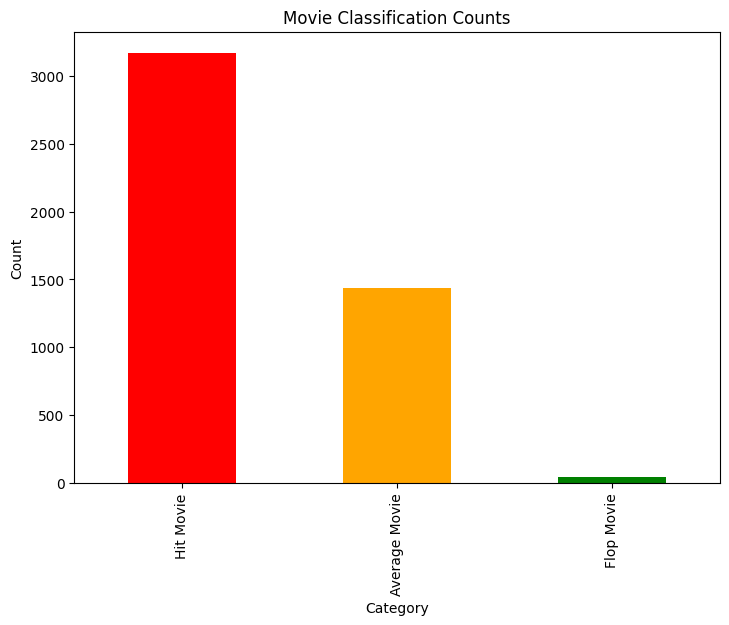

In [26]:

plt.figure(figsize=(14, 17))

plt.subplot(3, 2, 1)
data['Classify'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Movie Classification Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

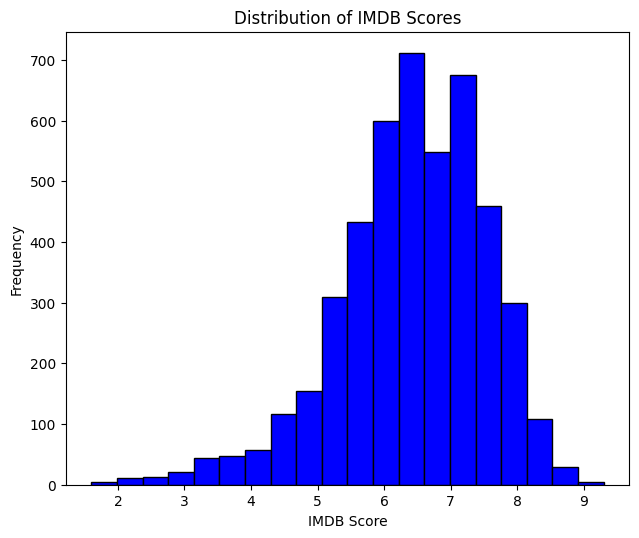

In [27]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 2)
plt.hist(data['imdb_score'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')

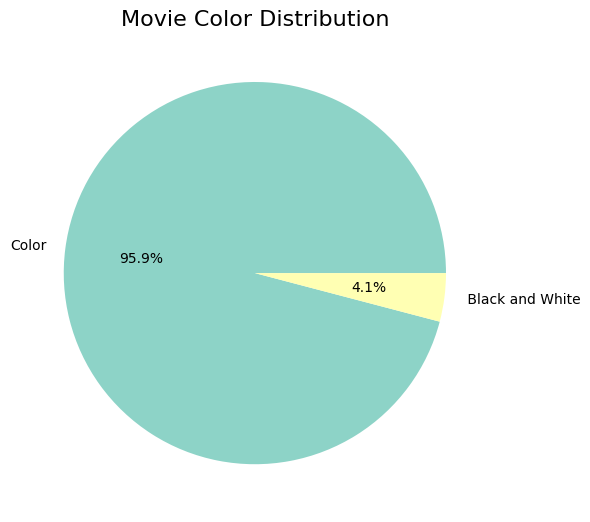

In [28]:
plt.figure(figsize=(6,6))
colors = data['color']
labels = colors.unique()
sizes = [colors.tolist().count(label) for label in labels]

plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=sns.color_palette("Set3"))
plt.title('Movie Color Distribution', fontsize=16)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Content Rating')

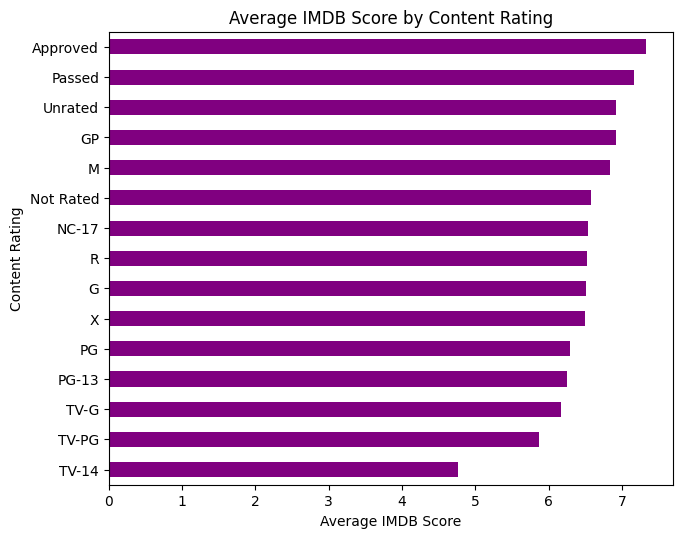

In [29]:
plt.figure(figsize=(16, 20))
content_rating_avg = data.groupby('content_rating')['imdb_score'].mean().sort_values()
plt.subplot(3, 2, 3)
content_rating_avg.plot(kind='barh', color='purple')
plt.title('Average IMDB Score by Content Rating')
plt.xlabel('Average IMDB Score')
plt.ylabel('Content Rating')

<ipython-input-30-3421e1b46bac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")


Text(0, 0.5, 'Director')

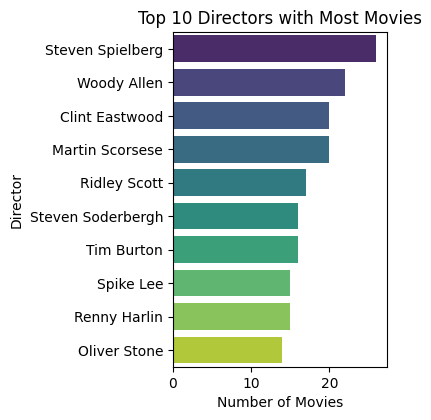

In [30]:
plt.figure(figsize=(16, 20))
top_directors = data['director_name'].value_counts().head(10)
plt.subplot(4, 5, 1)
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')

Text(0, 0.5, 'Average IMDB Score')

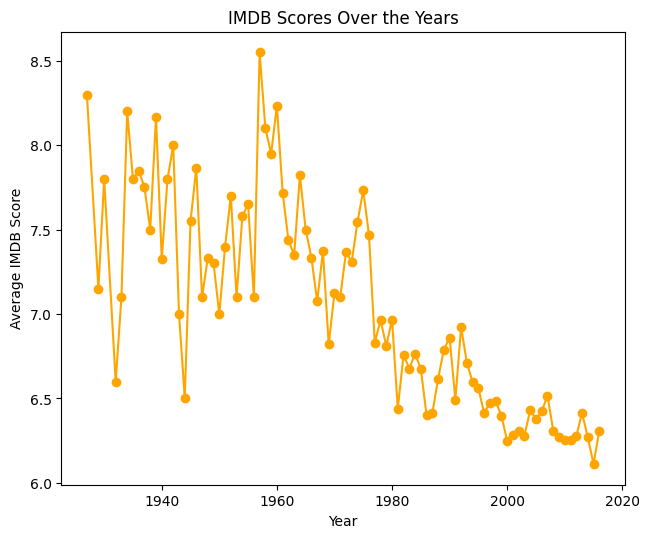

In [31]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 4)
yearly_scores = data.groupby('title_year')['imdb_score'].mean()
yearly_scores.plot(color='orange', marker='o')
plt.title('IMDB Scores Over the Years')
plt.xlabel('Year')
plt.ylabel('Average IMDB Score')

<ipython-input-32-d31ca44cb02b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='language', y='imdb_score', data=data, palette='viridis', ci=None)
<ipython-input-32-d31ca44cb02b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='language', y='imdb_score', data=data, palette='viridis', ci=None)


Text(0, 0.5, 'IMDB Score')

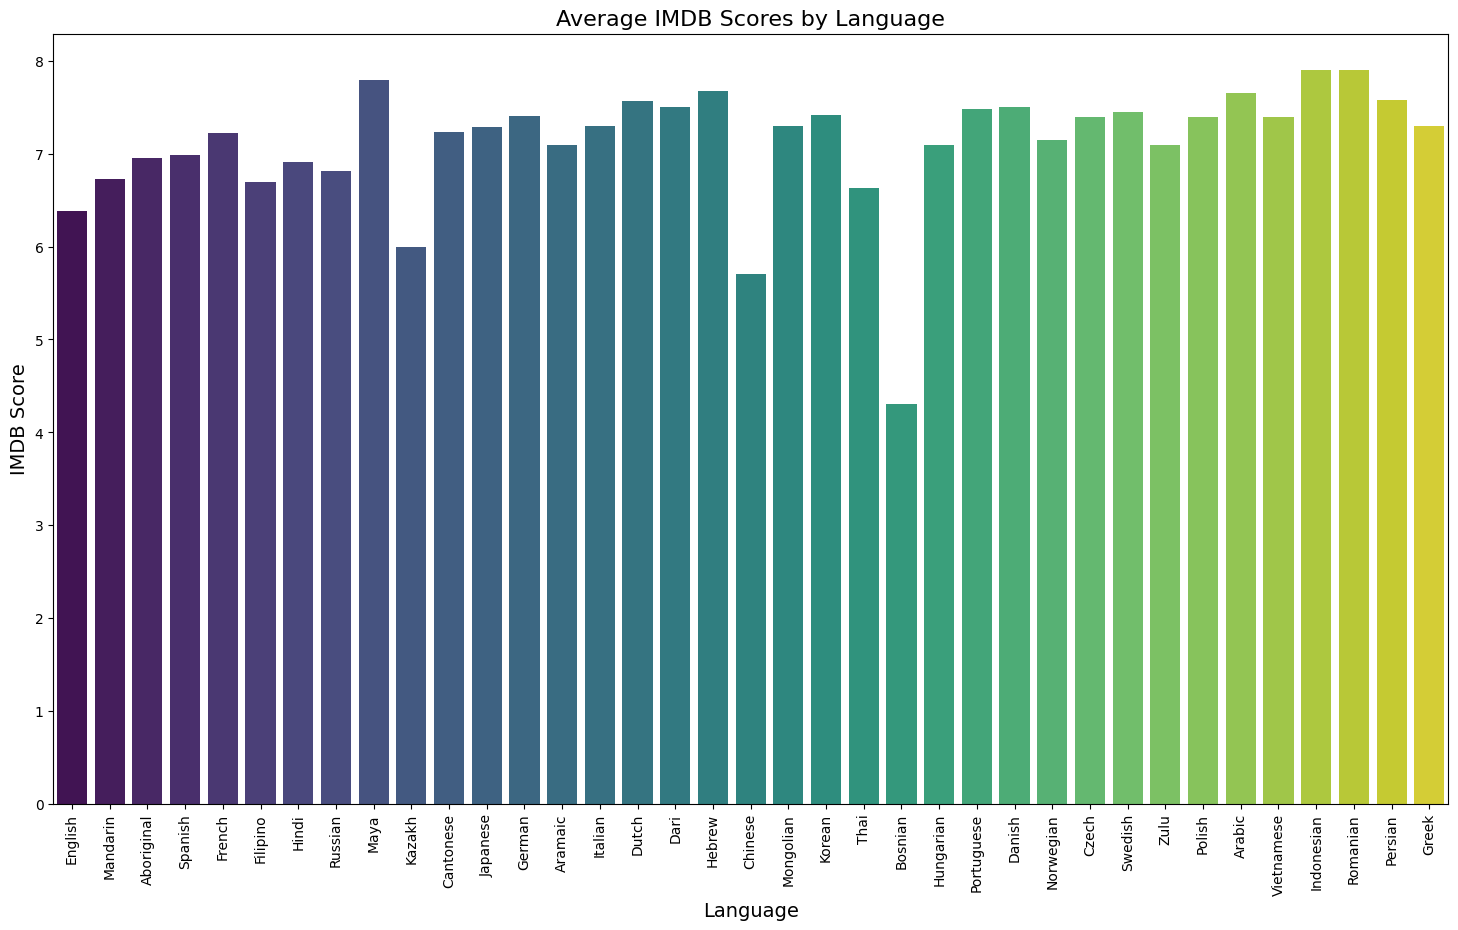

In [32]:
plt.figure(figsize=(18, 10))
sns.barplot(x='language', y='imdb_score', data=data, palette='viridis', ci=None)
plt.xticks(rotation=90)
plt.title('Average IMDB Scores by Language', fontsize=16)
plt.xlabel('Language', fontsize=14)
plt.ylabel('IMDB Score', fontsize=14)

Text(0, 0.5, 'IMDB Score')

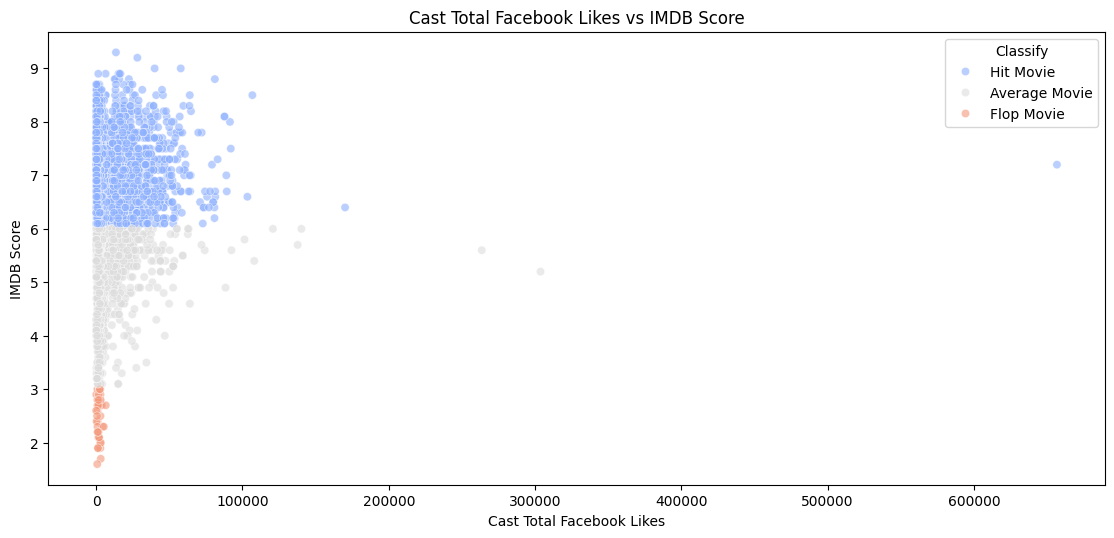

In [33]:
plt.figure(figsize=(30, 20))
plt.subplot(3, 2, 3)
sns.scatterplot(x='cast_total_facebook_likes', y='imdb_score', data=data, alpha=0.6, hue='Classify', palette='coolwarm')
plt.title('Cast Total Facebook Likes vs IMDB Score')
plt.xlabel('Cast Total Facebook Likes')
plt.ylabel('IMDB Score')



Text(0, 0.5, 'Average IMDB Score')

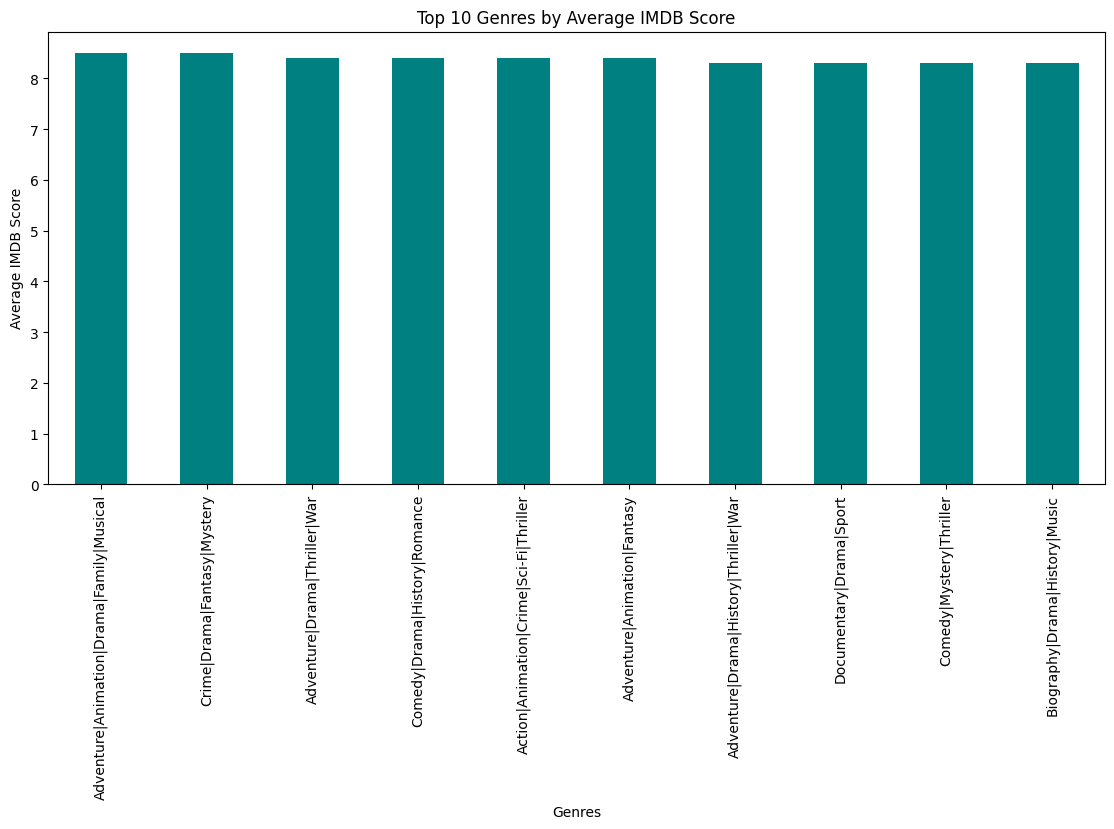

In [34]:
plt.figure(figsize=(30, 20))
plt.subplot(3, 2, 1)
genre_scores = data.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(10)
genre_scores.plot(kind='bar', color='teal')
plt.title('Top 10 Genres by Average IMDB Score')
plt.xlabel('Genres')
plt.ylabel('Average IMDB Score')

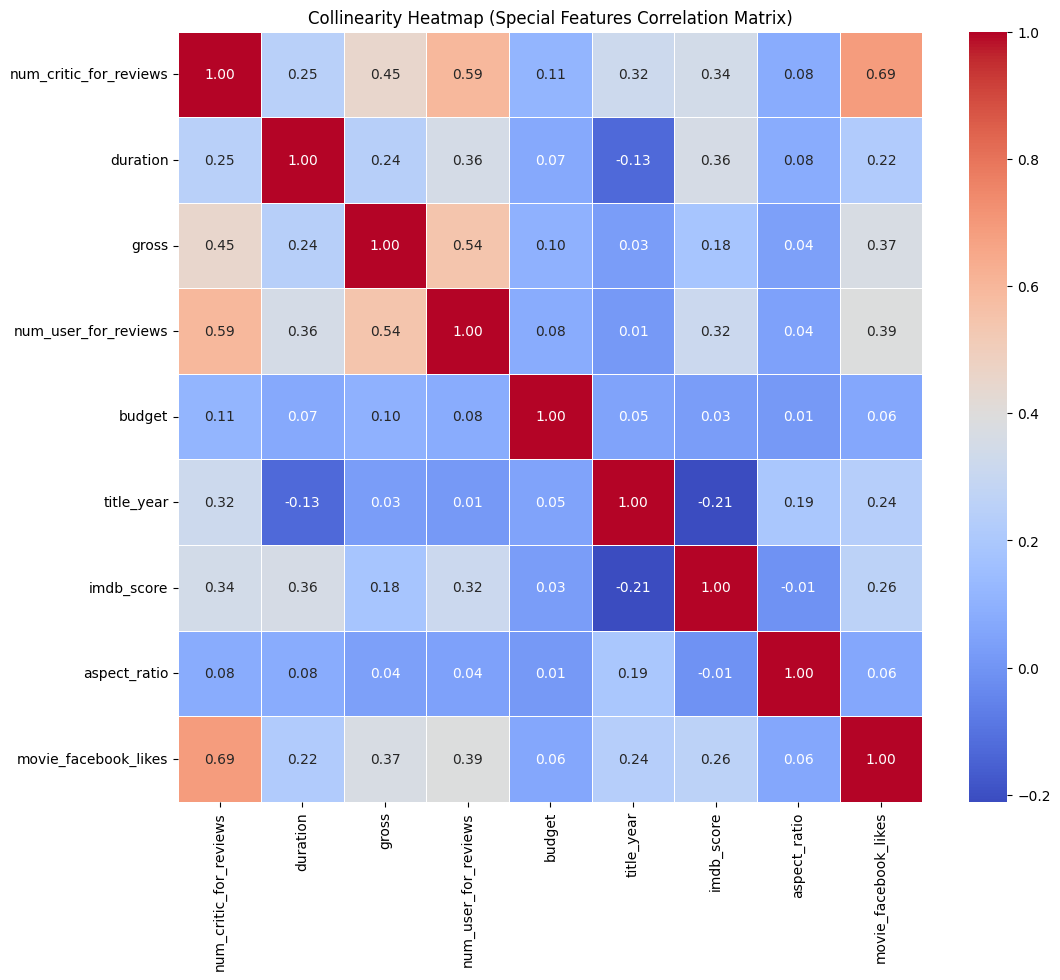

In [35]:
special_features_data = data[special_features]

correlation_matrix = special_features_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Collinearity Heatmap (Special Features Correlation Matrix)")
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['color'] = lb.fit_transform(data['color'])
data['Classify'] = lb.fit_transform(data['Classify'])

<ipython-input-36-07c96618b7a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = lb.fit_transform(data['color'])
<ipython-input-36-07c96618b7a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Classify'] = lb.fit_transform(data['Classify'])


In [37]:
frequency_encoding = data['director_name'].value_counts().to_dict()
data['director_name'] = data['director_name'].map(frequency_encoding)

frequency_encoding = data['actor_2_name'].value_counts().to_dict()
data['actor_2_name'] = data['actor_2_name'].map(frequency_encoding)

frequency_encoding = data['actor_1_name'].value_counts().to_dict()
data['actor_1_name'] = data['actor_1_name'].map(frequency_encoding)

frequency_encoding = data['genres'].value_counts().to_dict()
data['genres'] = data['genres'].map(frequency_encoding)

frequency_encoding = data['actor_3_name'].value_counts().to_dict()
data['actor_3_name'] = data['actor_3_name'].map(frequency_encoding)

frequency_encoding = data['country'].value_counts().to_dict()
data['country'] = data['country'].map(frequency_encoding)

frequency_encoding = data['language'].value_counts().to_dict()
data['language'] = data['language'].map(frequency_encoding)

frequency_encoding = data['content_rating'].value_counts().to_dict()
data['content_rating'] = data['content_rating'].map(frequency_encoding)

<ipython-input-37-c091beec3921>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['director_name'] = data['director_name'].map(frequency_encoding)
<ipython-input-37-c091beec3921>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actor_2_name'] = data['actor_2_name'].map(frequency_encoding)
<ipython-input-37-c091beec3921>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [38]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Classify
0,1,7,723.0,178.0,0.0,855.0,4,1000.0,760505847.0,12,...,4410,3578,1455,237000000.0,2009.0,936.0,7.9,1.78,33000.0,2
1,1,7,302.0,169.0,563.0,1000.0,7,40000.0,309404152.0,29,...,4410,3578,1455,300000000.0,2007.0,5000.0,7.1,2.35,0.0,2
2,1,8,602.0,148.0,0.0,161.0,2,11000.0,200074175.0,46,...,4410,414,1455,245000000.0,2015.0,393.0,6.8,2.35,85000.0,2
3,1,8,813.0,164.0,22000.0,23000.0,5,27000.0,448130642.0,29,...,4410,3578,1455,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,2
5,1,3,462.0,132.0,475.0,530.0,3,640.0,73058679.0,50,...,4410,3578,1455,263700000.0,2012.0,632.0,6.6,2.35,24000.0,2


In [39]:
data['Classify'].value_counts()

,count
Classify,
2,3167
0,1437
1,42


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4646 entries, 0 to 5042
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4646 non-null   int64  
 1   director_name              4646 non-null   int64  
 2   num_critic_for_reviews     4646 non-null   float64
 3   duration                   4646 non-null   float64
 4   director_facebook_likes    4646 non-null   float64
 5   actor_3_facebook_likes     4646 non-null   float64
 6   actor_2_name               4646 non-null   int64  
 7   actor_1_facebook_likes     4646 non-null   float64
 8   gross                      4646 non-null   float64
 9   genres                     4646 non-null   int64  
 10  actor_1_name               4646 non-null   int64  
 11  num_voted_users            4646 non-null   int64  
 12  cast_total_facebook_likes  4646 non-null   int64  
 13  actor_3_name               4646 non-null   int64  
 1

In [41]:
data['Classify'].value_counts()

,count
Classify,
2,3167
0,1437
1,42


Random Forest Model

In [42]:
X = data.drop(columns='Classify',axis=1)
y = data['Classify']

In [43]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [44]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       157
           1       0.88      0.90      0.89       143

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [45]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

y_pred = rf.predict(X_test)


mae = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mae * 100:.2f}%")


r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2 * 100 :.2f}%")

MAPE: 21016798261062320.00%
R² Score: 58.64%


Logistics Regression Model

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [47]:

X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
lr = LogisticRegression(multi_class = 'multinomial' , solver='lbfgs',max_iter=10000)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='multinomial')

In [49]:
y_pred = lr.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       151
           1       0.94      0.90      0.92       149

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



SVM Model

In [52]:
from sklearn import svm

In [53]:
svm_class = svm.SVC(kernel = 'linear', C=1)

In [54]:
svm_class.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [55]:
Y_pred = svm_class.predict(X_test)

In [56]:
accuracy_score(y_pred,y_test)

0.92

In [57]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       157
           1       0.90      0.94      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [58]:
print(confusion_matrix(y_pred , y_test))

[[142  15]
 [  9 134]]
